In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"Data\Toddler_Autism_Processed.csv")
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian,Who_completed_the_test_family member,Who_completed_the_test_health care professional,Who_completed_the_test_others,Who_completed_the_test_self,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,...,False,False,True,False,False,True,False,False,False,0
1,1,1,0,0,0,1,1,0,0,0,...,False,False,False,False,False,True,False,False,False,1
2,1,0,0,0,0,0,1,1,0,1,...,False,False,True,False,False,True,False,False,False,1
3,1,1,1,1,1,1,1,1,1,1,...,False,False,False,False,False,True,False,False,False,1
4,1,1,0,1,1,1,1,1,1,1,...,False,False,False,False,False,True,False,False,False,1


In [3]:
# splitting the data
X=df.drop("Class/ASD Traits ",axis=1)
y=df["Class/ASD Traits "]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Testing different models

In [4]:
model_lr=LogisticRegression(max_iter=10000,solver='liblinear', random_state=0)
model_lr.fit(X_train,y_train)
y_pred_lr=model_lr.predict(X_test)
accuracy=accuracy_score(y_test, y_pred_lr)
accuracy

0.9965753424657534

In [5]:
model_knn = KNeighborsClassifier(n_neighbors=13) # toggled off
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
accuracy=accuracy_score(y_test, y_pred_knn)
accuracy

0.9554794520547946

In [6]:
model_nb = GaussianNB() #toggled off
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)
accuracy=accuracy_score(y_test, y_pred_nb)
accuracy

0.8184931506849316

In [7]:
model_dt = tree.DecisionTreeClassifier() # toggled off
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
accuracy=accuracy_score(y_test, y_pred_dt)
accuracy

0.9383561643835616

In [8]:
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train,y_train)
y_pred_rfc=model_rfc.predict(X_test)
accuracy=accuracy_score(y_test, y_pred_rfc)
accuracy

0.9691780821917808

In [9]:
model_svm = SVC(kernel='rbf')
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
accuracy=accuracy_score(y_test, y_pred_svm)
accuracy

0.976027397260274

In [10]:
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train, y_train) 
y_pred_xgb = model_xgb.predict(X_test)
accuracy=accuracy_score(y_test, y_pred_xgb)
accuracy

0.9863013698630136

### GridSearchCV

In [11]:
models = {
    'lr': LogisticRegression(),
    'rfc': RandomForestClassifier(),
    'svm': SVC(), 
    'xgb': XGBClassifier()
  }

param_grid={
  'lr': { 
        'C': [0.1, 1],
        'max_iter':[100,200],
        'solver': ['liblinear', 'saga'],
        'penalty': ['l1', 'l2']
    },
    'rfc': {
        'n_estimators': [100, 200], # number of trees
        'max_depth': [5, 10],
        'min_samples_split': [2, 5],
        'criterion' : ['gini', 'entropy'],
        'n_jobs': [-1]
    },
    'svm': { 
        'C': [0.1, 1],
        'kernel': ['poly', 'sigmoid', 'rbf'],
        'degree': [3, 4],
        'random_state': [42]
    },
    'xgb': { 
        'max_depth': [5, 10],
        'learning_rate': [0.1, 0.01],
        'loss': ['log_loss', 'exponential'],
        'random_state': [42]
    }
}  

In [12]:
best_models={}
for name, model in models.items():
      #cv for cross validation
      grid_search=GridSearchCV(estimator=model, param_grid=param_grid[name],cv=5, n_jobs=-1, scoring='accuracy')
      grid_search.fit(X_train, y_train)
      best_models[name] = {
            "score": grid_search.best_score_,
            "params": grid_search.best_params_,
            "model": grid_search.best_estimator_
      }
best_models

{'lr': {'score': 1.0,
  'params': {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'},
  'model': LogisticRegression(C=1, penalty='l1', solver='saga')},
 'rfc': {'score': 0.9819594494598194,
  'params': {'criterion': 'gini',
   'max_depth': 10,
   'min_samples_split': 2,
   'n_estimators': 200,
   'n_jobs': -1},
  'model': RandomForestClassifier(max_depth=10, n_estimators=200, n_jobs=-1)},
 'svm': {'score': 0.9888375018499334,
  'params': {'C': 1, 'degree': 3, 'kernel': 'poly', 'random_state': 42},
  'model': SVC(C=1, kernel='poly', random_state=42)},
 'xgb': {'score': 0.9888301021163238,
  'params': {'learning_rate': 0.1,
   'loss': 'log_loss',
   'max_depth': 5,
   'random_state': 42},
  'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,

### Stacking optimized models

In [13]:
base_models=[
    ("rfc",best_models["rfc"]["model"]),
    ("svm",best_models["svm"]["model"]),  
    ("xgboost",best_models["xgb"]["model"])
]
meta_model=best_models["lr"]["model"]
stacked_model=StackingClassifier(estimators=base_models,final_estimator=meta_model,cv=5)

Base models: Random Forest Classifier, Support Vector Machine, XGBoost
Meta model: Logistic Regression
Stacked Model
Accuracy:  0.9828767123287672
[[144   4]
 [  1 143]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       148
           1       0.97      0.99      0.98       144

    accuracy                           0.98       292
   macro avg       0.98      0.98      0.98       292
weighted avg       0.98      0.98      0.98       292

ROC AUC Score:  0.9830142642642643


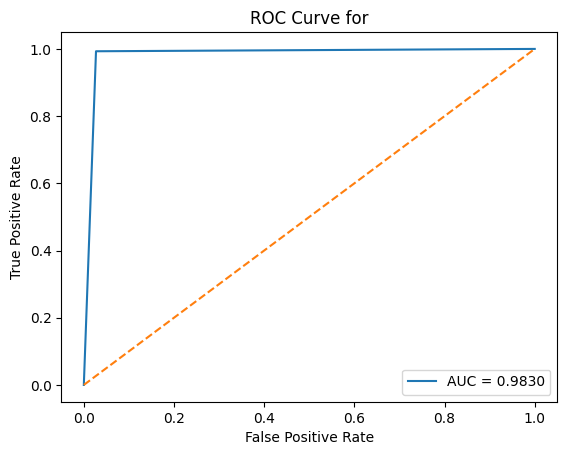

In [ ]:
# evaluation metrics
# recall is important for disease prediction 
stacked_model.fit(X_train, y_train)
y_pred_stacked = stacked_model.predict(X_test)
print("Base models: Random Forest Classifier, Support Vector Machine, XGBoost")
print("Meta model: Logistic Regression")
print("Stacked Model")
print("Accuracy: ", accuracy_score(y_test, y_pred_stacked))
print(confusion_matrix(y_test,y_pred_stacked))
print(classification_report(y_test,y_pred_stacked))
y_pred_prob = stacked_model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_stacked)
print(f"ROC AUC Score: ", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_stacked)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [15]:
import joblib
# save model
joblib.dump(stacked_model,r"Model\Stacked_Model.pkl")
# load model
load_model=joblib.load(r"Model\Stacked_Model.pkl")